In [1]:
import cv2
import numpy as np
import torch
import os,glob
from PIL import Image


In [2]:
# model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/kpangalu/Downloads/scale_transparencies_battlemodes/results_test/exp10/weights/best.pt', force_reload=True)
model = torch.hub.load('ultralytics/yolov5', 'custom', path="/Users/kpangalu/Downloads/scale_transparencies_battlemodes/gunregions_scales_trans_t10incld_12Feb2023/weights/best.pt", force_reload=True) 
# print(model)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\kpangalu/.cache\torch\hub\master.zip
YOLOv5  2023-2-20 Python-3.9.7 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [7]:
# path = "/Users/kpangalu/Downloads/scale_transparencies_battlemodes/results_test/testing/test/"  #without 10% transparency
# path = "/Users/kpangalu/Downloads/scale_transparencies_battlemodes/results_test/testing/test_T10incld/"   #with 10%transpareancy
path = "/Users/kpangalu/Downloads/scale_transparencies_battlemodes/snpe_val/org_images/"
all_files = glob.glob(os.path.join(path, "*.png"))

conf1 = []
clss1 = []
#clssint = np.zeros(5000, dtype=int)
#j=-1
for imgf in all_files[0:3]:
    print(imgf)
    test_image = Image.open(imgf)
    results = model(test_image, size=640) 
    #pandas dataframe
    df = results.pandas().xyxy[0]
    display(df)
    #results in tensor format
    tnsr = results.xyxy[0].numpy()
    #print(tnsr,len(tnsr))
    for ii in range(len(tnsr)):
        #print(ii,tnsr[ii],len(tnsr[ii]),tnsr[ii][5])
        conf1.append(tnsr[ii][4])
        clss1.append(tnsr[ii][5])
        #j +=1
        #clssint[j] = int(tnsr[ii][5])

#list to array
#print(conf1)
#print(clss1)
conf = np.asarray(conf1)
clss = np.asarray(clss1)
# print(conf)
# print(clss)
# print(clssint)

/Users/kpangalu/Downloads/scale_transparencies_battlemodes/snpe_val/org_images\RYB_S100_T100_525.png


xmin        ymin         xmax        ymax  confidence  class  \
0  1335.382690  471.452026  1480.166870  608.345154    0.987604      3   
1    23.806337  313.189423   135.887253  421.170685    0.978246      2   
2   640.808167  587.034302   798.100037  650.830139    0.958386      0   
3   783.129700  586.203735   943.713501  652.023376    0.949075      1   

           name  
0  bullet_right  
1   bullet_left  
2   gunroi_left  
3  gunroi_right

/Users/kpangalu/Downloads/scale_transparencies_battlemodes/snpe_val/org_images\TCB_S100_T100_1110.png


xmin        ymin         xmax        ymax  confidence  class  \
0  1343.286133  473.233490  1472.548462  605.617493    0.968076      3   
1    37.279449  310.542053   150.874115  424.553986    0.917046      2   
2   244.001419  285.278778   418.098328  349.788483    0.906417      0   
3   724.629211  608.527527   868.393555  676.140137    0.840846      1   

           name  
0  bullet_right  
1   bullet_left  
2   gunroi_left  
3  gunroi_right

/Users/kpangalu/Downloads/scale_transparencies_battlemodes/snpe_val/org_images\TTB_S100_T75_72.png


xmin        ymin         xmax        ymax  confidence  class  \
0  1344.835083  473.239014  1472.197144  606.758728    0.978047      3   
1   264.099640  374.661163   438.066406  446.515564    0.962483      0   
2    39.423176  313.379333   151.421143  421.478149    0.961064      2   
3   721.822266  554.546143   883.198792  626.911316    0.919796      1   

           name  
0  bullet_right  
1   gunroi_left  
2   bullet_left  
3  gunroi_right

In [4]:
sp1 = [0.1,0.3,0.5,0.7]
ep1 = [0.3,0.5,0.7,1.0]
ress = np.empty((4,4), dtype=float)
respnts = np.empty((4,4), dtype=int)
for i in range(0,4):
    mss = np.where(clss == i)
    clssdata = clss[mss]
    confdata = conf[mss]
    conftot = len(confdata)
    #print(i,'  ',len(confdata))
    for j in range(0,4):
        sp = sp1[j]
        ep = ep1[j]
        ind = np.asarray(np.where((confdata >= sp) & (confdata <= ep)))
        indtot = len(ind[0])
        per = 100* (indtot/conftot)
        ress[i,j] = per
        respnts[i,j] = indtot
        if(i == 0): clnme = "gunroi_left"
        if(i == 1): clnme = "gunroi_right"
        if(i == 2): clnme = "bullet_left"
        if(i == 3): clnme = "bullet_right"
        print("{}: {}-{}:  {}%".format(clnme,sp,ep,per))
    print("___________")



ZeroDivisionError: division by zero

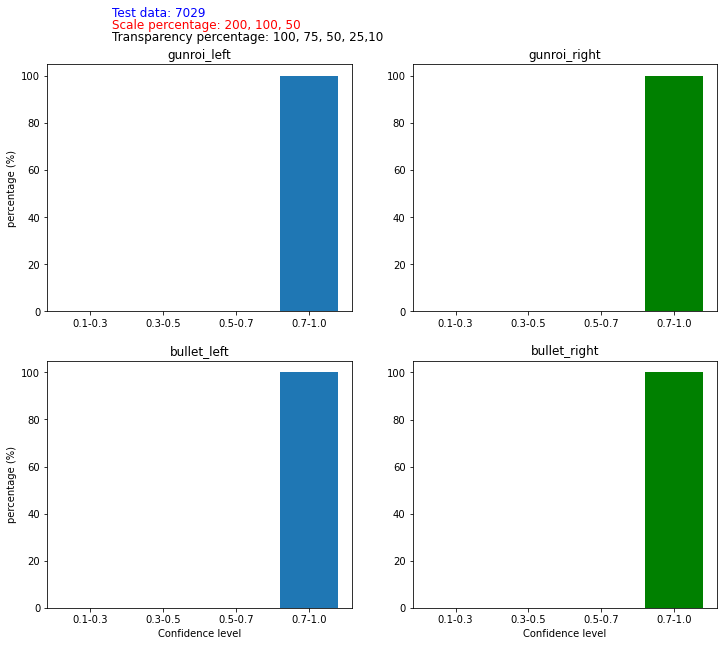

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))

plt.subplot(221)
x = ['0.1-0.3','0.3-0.5','0.5-0.7','0.7-1.0']
y = ress[0,:]
plt.bar(x,y)
plt.ylabel("percentage (%)")
plt.title('gunroi_left')

# # for i, v in enumerate(y):
# #     plt.text(x1[i], y + 0.01, str(v))
tit1 = "Test data: "+str(len(all_files))
tit2 = "Scale percentage: 200, 100, 50"
tit3 = "Transparency percentage: 100, 75, 50, 25,10"
plt.text(0.3, 125, tit1, fontsize=12,color='blue')
plt.text(0.3, 120, tit2, fontsize=12,color='red')
plt.text(0.3, 115, tit3, fontsize=12)

plt.subplot(222)
y = ress[1,:]
plt.bar(x,y,color='green')
plt.title('gunroi_right')

plt.subplot(223)
y = ress[2,:]
plt.bar(x,y)
plt.xlabel("Confidence level")
plt.ylabel("percentage (%)")
plt.title('bullet_left')

plt.subplot(224)
y = ress[3,:]
plt.bar(x,y,color='green')
plt.xlabel("Confidence level")
plt.title('bullet_right')

plt.savefig("/Users/kpangalu/Downloads/scale_transparencies_battlemodes/results_test/testing/yolo_dfrntscales_trans1.pdf")